In [1]:
from functools import partial
import pickle as pkl
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import soepy

from dev_library import get_criterion_function
from dev_library import plot_basics_choices
from dev_library import plot_basics_wages
from dev_library import df_alignment


In [2]:
fname = "/home/peisenha/structExpectations/data-exchange-sciebo/df-observed-data-weighted-subsample.pkl"
df_obs = pd.read_pickle(fname)

In [3]:
os.chdir("/home/peisenha/structExpectations/development/estimations/estimation-current")
from moments import get_moments
weighting_matrix = pkl.load(open("weighting-matrix.pkl", "rb"))
moments_obs = pkl.load(open("observed-moments.pkl", "rb"))

### Parameterization

In [4]:
model_params_start = pd.read_pickle("start.soepy.pkl")
model_params_start

value    upper    lower  fixed
category          name                                                        
benefits_base                              200.000000  1000.00  100.000   True
const_wage_eq     gamma_0s1                  2.200000     3.70    1.380   True
                  gamma_0s2                  2.200000     3.70    1.380   True
                  gamma_0s3                  2.200000     3.70    1.380   True
delta                                        0.971317     0.99    0.900   True
disutil_work      child_02_f                 2.004943     3.00   -0.000  False
                  child_02_p                -1.354728     0.00   -2.000  False
                  child_35_f                 1.541779     2.00   -0.000  False
                  child_35_p                -1.162198     0.00   -2.000  False
                  child_6orolder_f           1.593837     2.00   -0.000  False
                  child_6orolder_p          -1.403251     0.00   -2.000  False
                  no_kids_f_educ_high        0.639093     1.00   -0.000  False
                  no_kids_f_educ_low         0.796898     1.50   -0.000  False
                  no_kids_f_educ_middle      0.710784     1.00   -0.000  False
                  no_kids_p_educ_high       -0.482122     0.00   -1.000  False
                  no_kids_p_educ_low        -0.562123     0.00   -1.000  False
                  no_kids_p_educ_middle     -0.384779     0.00   -1.000  False
                  yes_kids_f_educ_high       0.684388     2.00   -0.000  False
                  yes_kids_f_educ_low        1.107766     2.00   -0.000  False
                  yes_kids_f_educ_middle     0.644808     2.00   -0.000  False
                  yes_kids_p_educ_high      -0.535057     0.00   -1.000  False
                  yes_kids_p_educ_low       -0.802622     0.00   -1.000  False
                  yes_kids_p_educ_middle    -0.799710     0.00   -1.000  False
exp_accm          g_s1                       0.083693     0.50    0.001   True
                  g_s2                       0.205770     0.50    0.001   True
                  g_s3                       0.226319     0.50    0.001   True
exp_accm_expected g_bar_s1                   0.570000     0.90    0.100   True
                  g_bar_s2                   0.535000     0.90    0.100   True
                  g_bar_s3                   0.625000     0.90    0.100   True
exp_deprec        delta_s1                   0.020000     0.20    0.001   True
                  delta_s2                   0.020000     0.20    0.001   True
                  delta_s3                   0.020000     0.20    0.001   True
exp_returns       gamma_1s1                  0.125000     0.50    0.001   True
                  gamma_1s2                  0.200000     0.50    0.001   True
                  gamma_1s3                  0.300000     0.50    0.001   True
hetrg_unobs       theta_f1                  -0.861178    -0.10   -3.000   True
                  theta_p1                  -0.409543    -0.10   -3.000   True
mu                                          -0.392753    -0.99   -0.010   True
sd_wage_shock     sigma_1                    0.336740     1.00    0.001   True
                  sigma_2                    0.363327     1.00    0.001   True
shares            share_1                    0.844696     0.90    0.100   True
fval              fval                    7036.029624      NaN      NaN   True

### Simulation sample

In [6]:
df_sim_step = soepy.simulate(model_params_start, "resources/model_spec_init.yml")
df_sim_step = df_alignment(df_sim_step)
df_sim_step.to_pickle("df_sim.soepy.pkl")

### Criterion function

In [7]:
moments_sim = get_moments(df_sim_step)
fval = get_criterion_function(moments_obs, moments_sim, weighting_matrix)
print(f"Value of criterion function: {fval:3.5}")

/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


Value of criterion function: 7313.0


### Plots

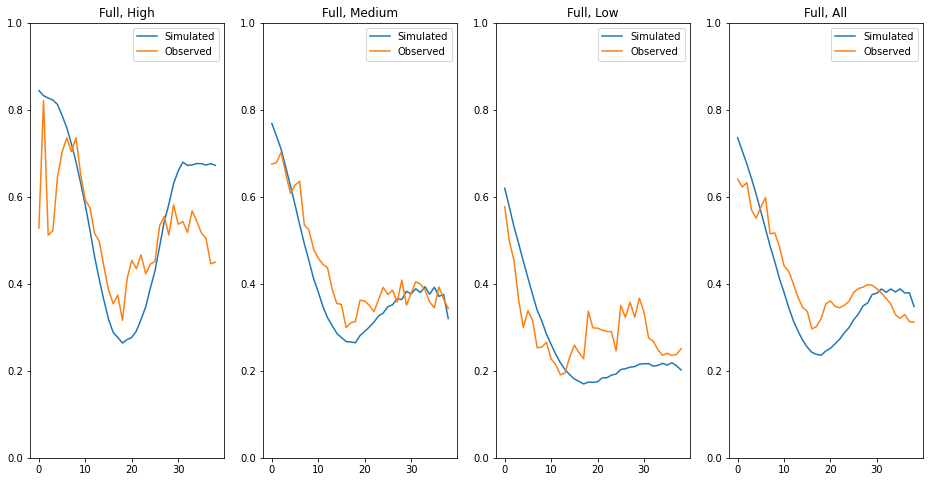

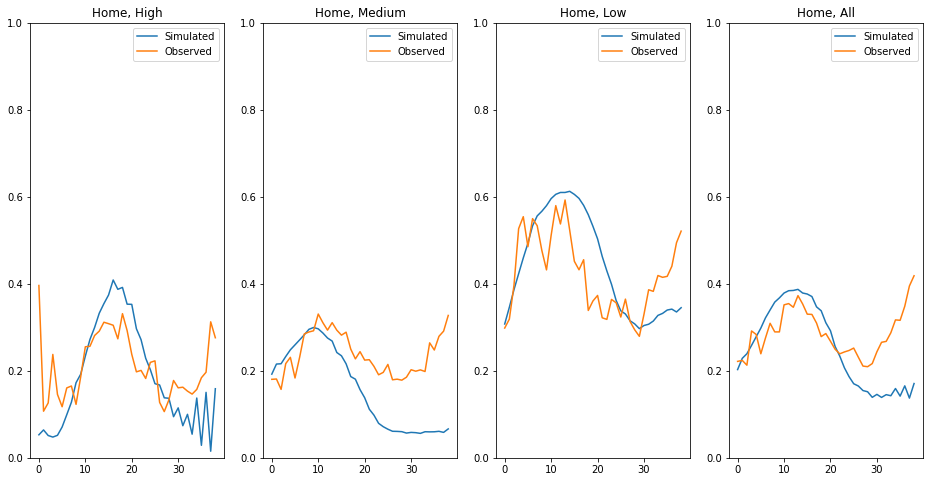

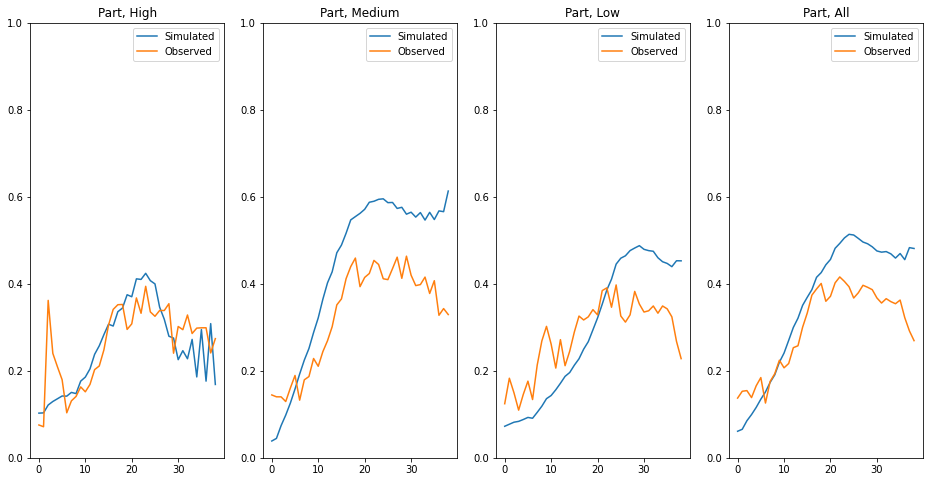

In [8]:
plot_basics_choices(df_sim=df_sim_step, df_obs=df_obs)

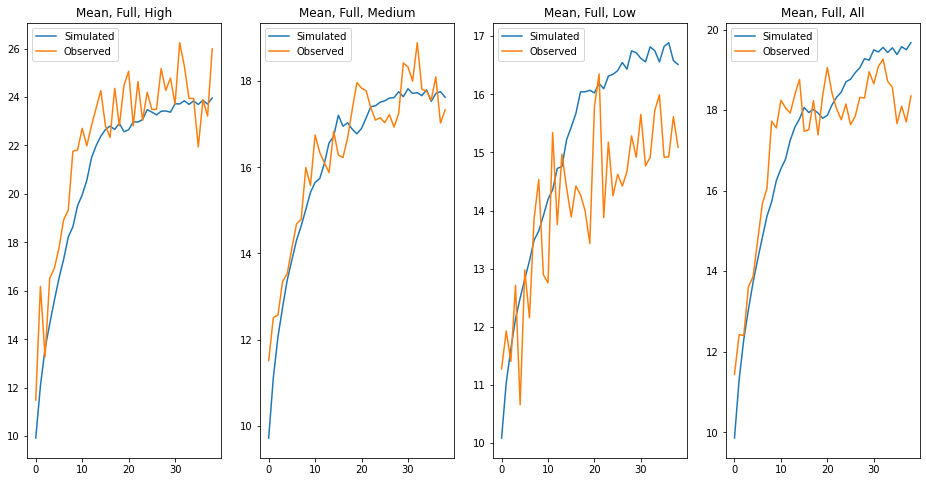

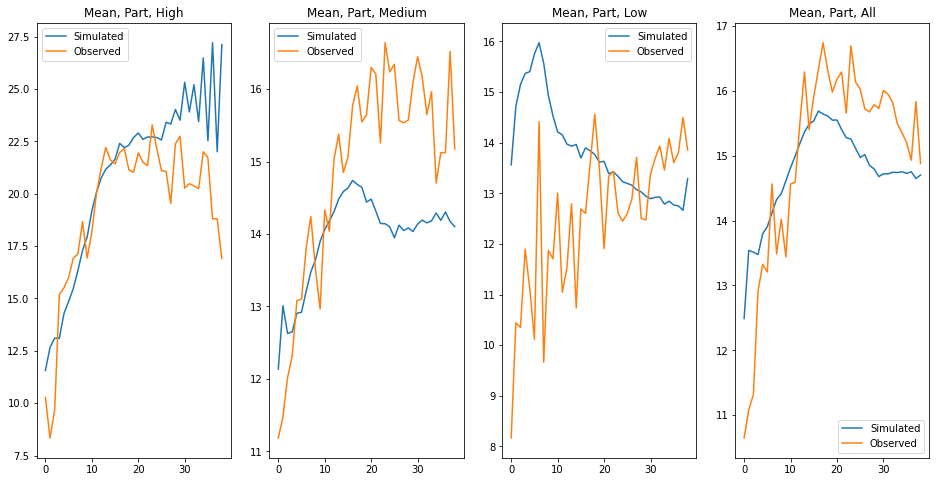

In [9]:
plot_basics_wages(df_sim=df_sim_step, df_obs=df_obs)